# Proyecto Final

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Conjunto de datos

In [121]:
datasetFile = "dataset.csv"
dataFrame = pd.read_csv(datasetFile, sep = ';',header = 0)

# Remove the non-numeric columns
dataFrame = dataFrame._get_numeric_data()
dataFrame = dataFrame.dropna(axis='columns')

# Drop unneeded features
dataFrame = dataFrame.drop('MSSIM', 1)
dataFrame = dataFrame.drop('VIF', 1)
dataFrame = dataFrame.drop('VSNR', 1)
dataFrame = dataFrame.drop('VIFP', 1)
dataFrame = dataFrame.drop('NQM', 1)
dataFrame = dataFrame.drop('XYZ', 1)
dataFrame = dataFrame.drop('IFC', 1)
dataFrame = dataFrame.drop('PSNR-HVS-M', 1)
dataFrame = dataFrame.drop('PSNRY', 1)
dataFrame = dataFrame.drop('PSNR', 1)
dataFrame = dataFrame.drop('SNR', 1)
dataFrame = dataFrame.drop('WSNR', 1)
dataFrame = dataFrame.drop('DCTUNE', 1)
dataFrame = dataFrame.drop('MOS', 1)

# Get the numeric headers in a python list
numericHeaders = list(dataFrame.columns.values)

# Get a numpy array
npData = dataFrame.values

featuresDataFrame = dataFrame.loc[:,numericHeaders[0]:numericHeaders[len(numericHeaders) - 3]]
targetDataFrame = dataFrame["MOS-STD"]

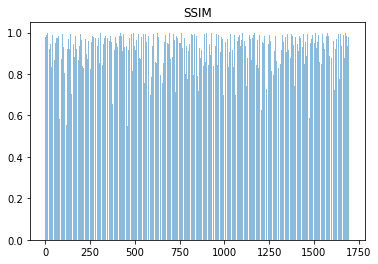

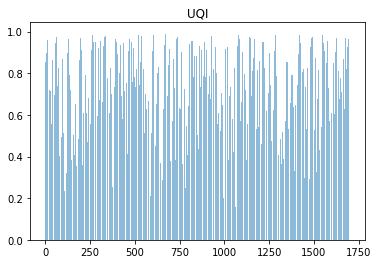

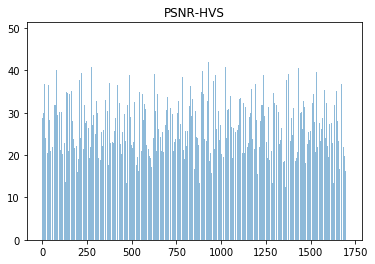

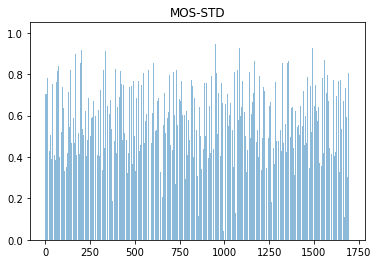

In [122]:
index = 0
for metric in numericHeaders:
    y_pos = np.arange(len(npData[:, index]))
    performance = list(npData[:, index])
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.title(metric)
    plt.show()
    index += 1

## Dividir el conjunto de datos

In [150]:
# Split the data
train = dataFrame.sample(frac = 0.8, random_state = 200)
test = dataFrame.drop(train.index)

# Set the feature and target datasets
X_train = train.loc[:,numericHeaders[0]:numericHeaders[len(numericHeaders) - 2]]
Y_train = train["MOS-STD"]
X_test = test.loc[:,numericHeaders[0]:numericHeaders[len(numericHeaders) - 2]]
Y_test = test["MOS-STD"]

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

1360 train samples
340 test samples


## Arquitectura de la red neuronal

In [151]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

model = Sequential()

model.add(Dense(128, input_dim=3))
model.add(Activation('relu'))
model.add(Dropout(.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

    
# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               512       
_________________________________________________________________
activation_61 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_62 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 65        
__________

## Entrenamiento del modelo

In [ ]:
# Training the model
model.fit(X_train, Y_train, epochs=200, batch_size=100, validation_split=0.25, verbose=0)

## Verificación del modelo

In [149]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, Y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, Y_test)
print("\n Testing Accuracy:", score[1])

1020/1020 [==============================] - 0s 74us/step

 Training Accuracy: 0.00196078431372549
680/680 [==============================] - 0s 95us/step

 Testing Accuracy: 0.0029411764705882353
